# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import missingno as msno


df = pd.read_csv('telecom_users.csv', index_col=0)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


<AxesSubplot:>

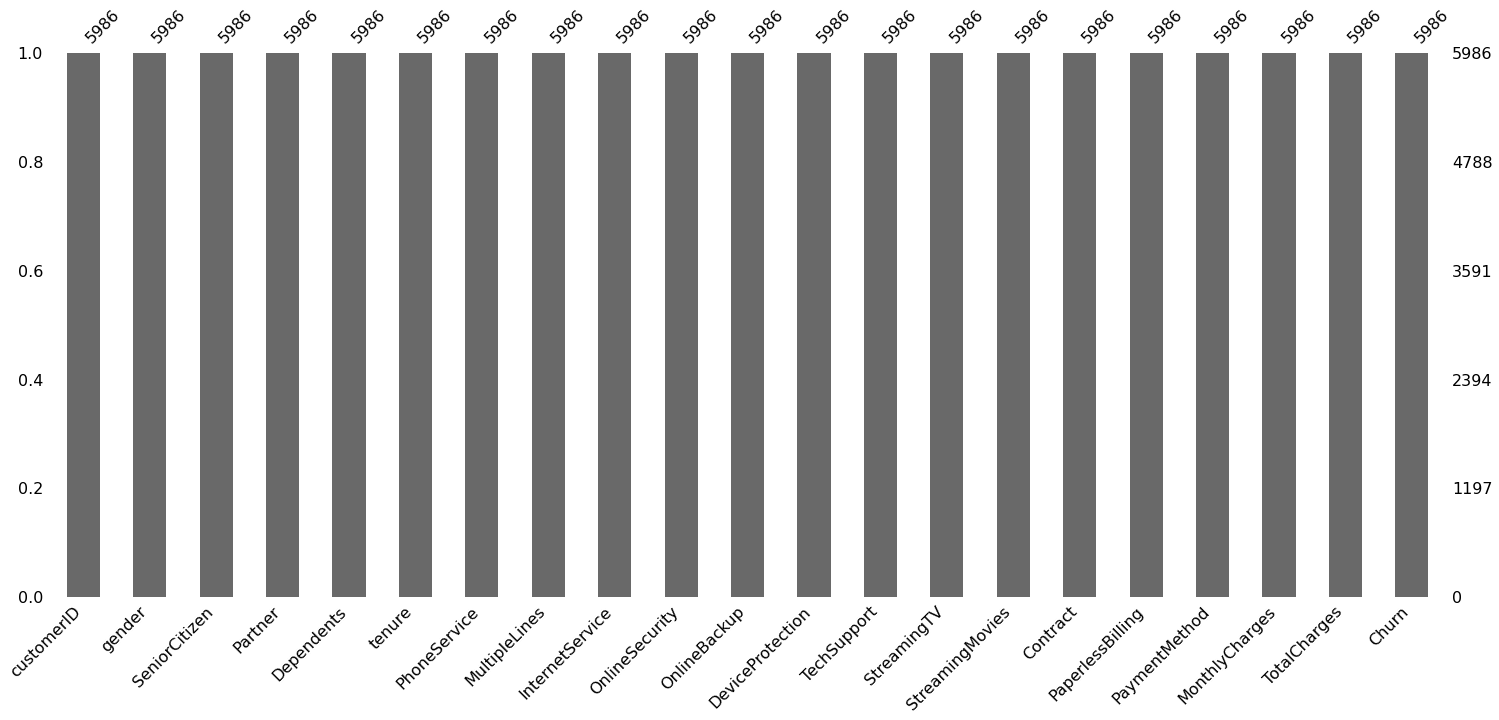

In [2]:
# проверяем пропущенные значения
msno.bar(df)

In [3]:
df.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [4]:
df.describe(include=[np.object])

C:\Users\User\AppData\Local\Temp\ipykernel_16364\127470446.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


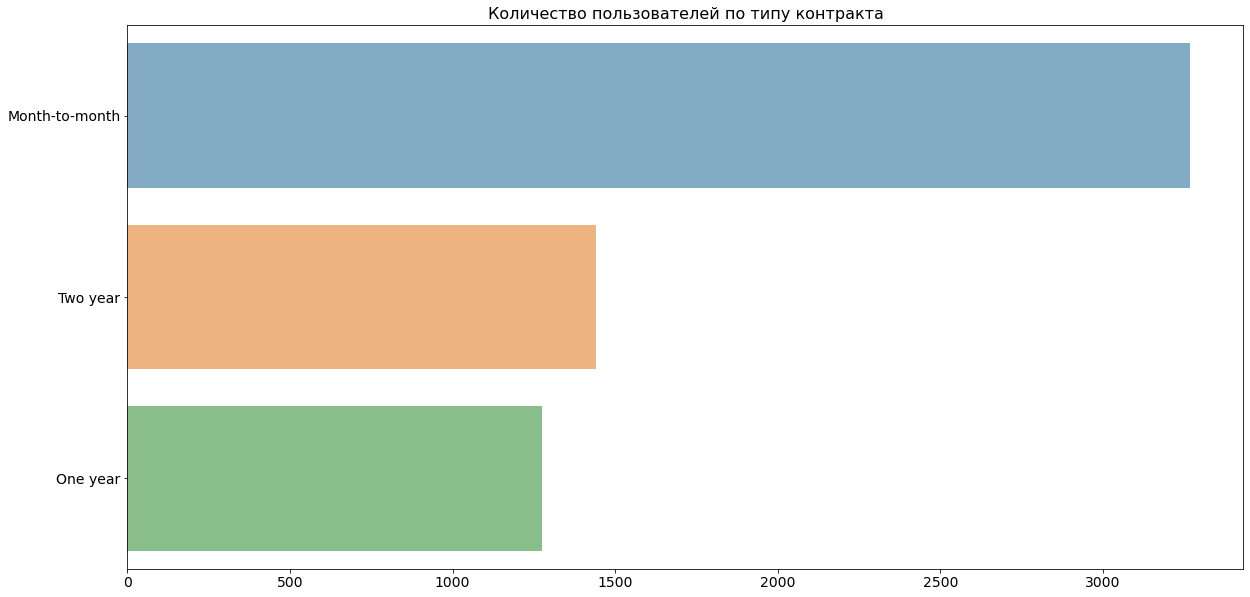

In [5]:
сontract = df['Contract'].value_counts()[df['Contract'].value_counts(normalize=True)> 0.005]
list_Contract = list(сontract.index)

plt.figure(figsize=(20,10))
plt.title("Количество пользователей по типу контракта", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=сontract.index, x=сontract.values, alpha=0.6)
plt.show()

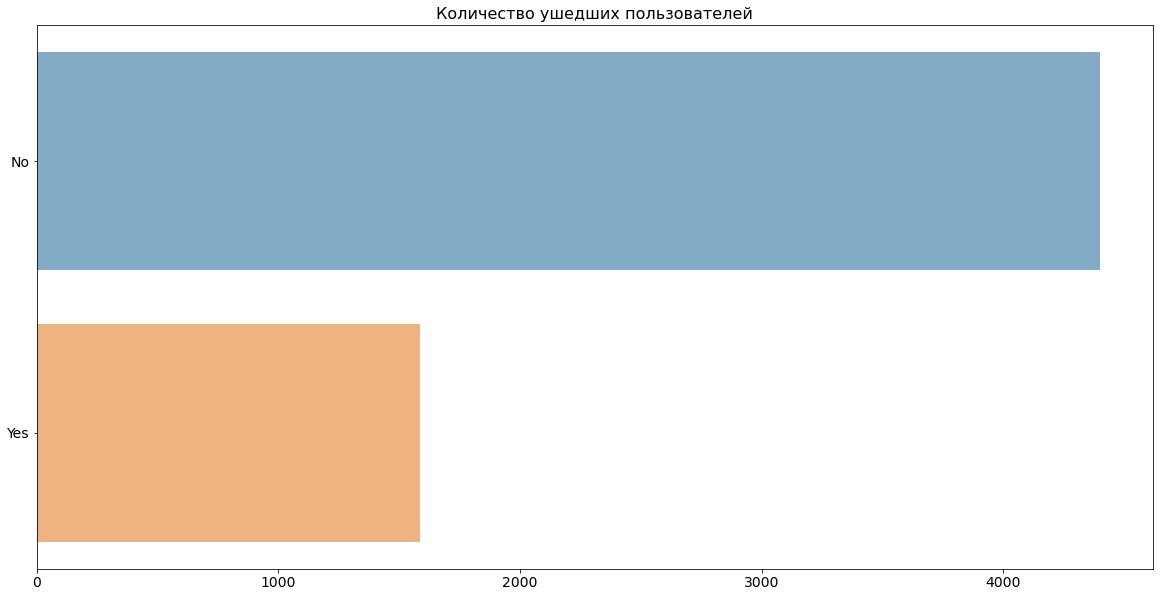

In [6]:
сhurn = df['Churn'].value_counts()[df['Churn'].value_counts(normalize=True)> 0.005]
list_Churn = list(сhurn.index)

plt.figure(figsize=(20,10))
plt.title("Количество ушедших пользователей", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=сhurn.index, x=сhurn.values, alpha=0.6)
plt.show()

В этом датасете содержатся данные почти о 6000 пользователей. У большей части пользователей контракт помесячный. Большая часть пользователей 4399 не ушли. 

In [7]:
# # преобразовываем данные

# заменяем пустое значение на 0
df.loc[(df.TotalCharges == ' '), 'TotalCharges'] = 0
df['TotalCharges'] = df['TotalCharges'].astype(float)

df_defolt = df.copy()

df = df.drop(['customerID'], axis = 1)


# dummies
df = pd.get_dummies(df)

scaler = MinMaxScaler()
df['tenure'] = scaler.fit_transform(df['tenure'].values.reshape(-1, 1))
df['MonthlyCharges'] = scaler.fit_transform(df['MonthlyCharges'].values.reshape(-1, 1))
df['TotalCharges'] = scaler.fit_transform(df['TotalCharges'].values.reshape(-1, 1))


In [8]:
df_defolt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [9]:
drop_elements = ['gender_Female', 'Partner_No', 'Dependents_No', 
                 'PhoneService_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'MultipleLines_No', 
                 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 
                 'StreamingMovies_No', 'PaperlessBilling_No', 'Churn_No']
df = df.rename(columns = {'gender_Male' : 'gender', 'Partner_Yes' : 'Partner', 'Dependents_Yes' : 'Dependents', 
                              'PhoneService_Yes' : 'PhoneService', 'Churn_Yes' : 'Churn'})

df = df.drop(drop_elements, axis = 1)
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1869,0,1.000000,0.058209,0.199734,1,1,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
4528,0,0.611111,0.695522,0.457489,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
6344,1,0.527778,0.564179,0.330445,0,1,0,1,0,1,...,0,1,0,0,1,1,0,0,0,1
6739,0,0.055556,0.374627,0.027462,1,0,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
432,0,0.027778,0.350249,0.013760,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


# 2. Исследование зависимостей и формулирование гипотез

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

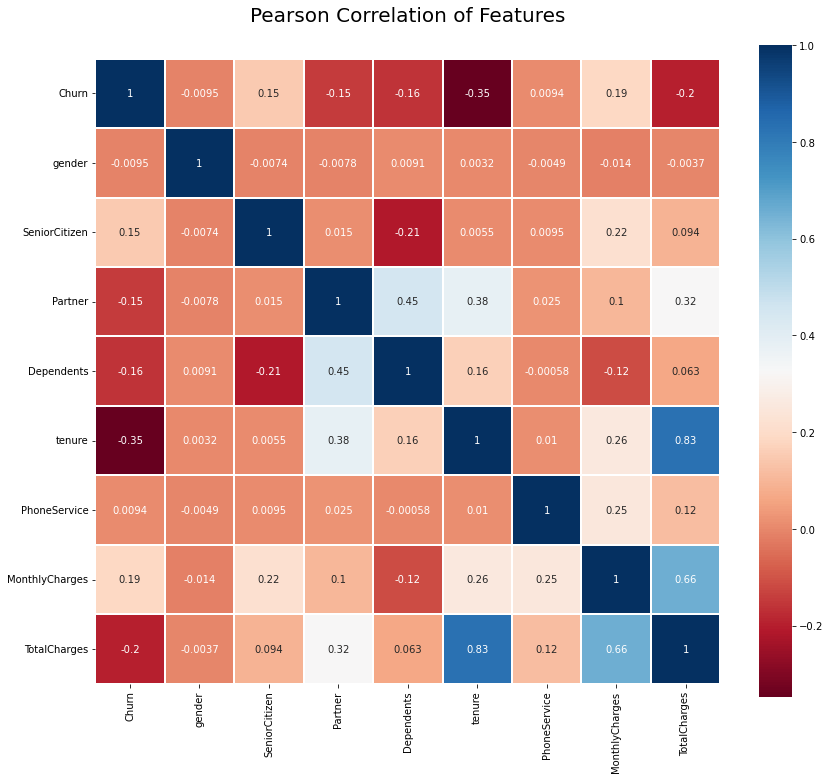

In [10]:
# смотрим зависимости на тепловой карте
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(df[[u'Churn', u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure', 
                     u'PhoneService', u'MonthlyCharges', u'TotalCharges']].corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [11]:
df = df.rename(columns = {'gender_Male' : 'gender', 'Partner_Yes' : 'Partner', 'Dependents_Yes' : 'Dependents', 
                              'PhoneService_Yes' : 'PhoneService', 'Churn_Yes' : 'Churn'})

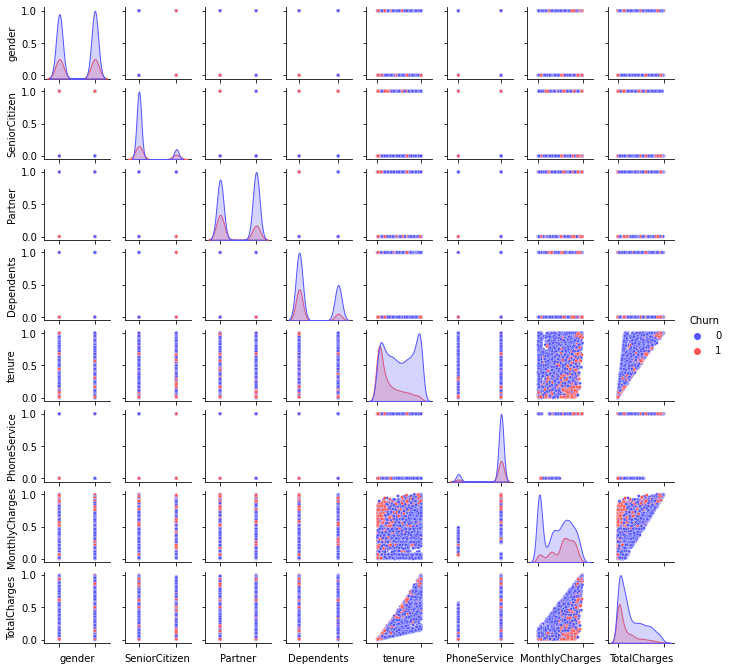

In [12]:
g = sns.pairplot(df[[u'Churn', u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure', 
                     u'PhoneService', u'MonthlyCharges', u'TotalCharges']], 
                 hue='Churn', palette = 'seismic', height=1.2, plot_kws=dict(s=10))
g.set(xticklabels=[])

Пол не влияет на уход клиента.
Клиенты у которых есть иждивенцы уходят чаще.
Можно отметить что, клиенты уходят в первые месяцы пользования услугами компании.
Клиенты у которых не подключены интернет сервисы уходят чаще.
Клиенты у которых по-месячный тип контракта уходят в разы чаще.
Клиенты у которых метод оплаты Electronic check уходят чаще.
Клиенты у которых ежемесячный платеж составляет от 70.4 до 89.9 в месяц уходят чаще.


# 3. Построение моделей для прогнозирования оттока

In [13]:
# создаем параметры для моделей для гридсерча
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)}

rfc_params = {'n_estimators': range(10, 100, 10),
              'min_samples_leaf': range(1, 5)}

dtc_params = {'max_depth' : range(1, 10, 1), 
              'min_samples_leaf' : range(1, 10, 2)}

svc_params = {'kernel': ['linear', 'rbf'], 
              'C': np.arange(0.1, 1, 0.2)}

gnb_params = {'var_smoothing': np.logspace(0,-9, num=100)}

lr_params = {'C': np.arange(0.5, 1, 0.1)}

knn_params = {'n_neighbors': range(1, 10)}

xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [14]:
# делим датасет на признаки и целевые значения
targets = df.copy().Churn
data = df.copy().drop(columns='Churn')


In [15]:
# делаем тренировачные и тестовые данные
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    targets,
                                                    train_size=0.7,
                                                    random_state=17)

# создаем модели
gbc = GradientBoostingClassifier(random_state=17)
rfc = RandomForestClassifier(random_state=17, class_weight='balanced')
dtc = DecisionTreeClassifier(random_state=17, class_weight='balanced')
svc = SVC(random_state=17, probability=True, class_weight='balanced')
gnb = GaussianNB()
lr = LogisticRegression(random_state=17, class_weight='balanced')
knn = KNeighborsClassifier()
xgb = XGBClassifier(n_estimators=40, random_state=17)


In [16]:
# ищем лучшием параметры
gbc_grid = GridSearchCV(gbc, gbc_params, cv=skf, n_jobs = -1)
rfc_grid = GridSearchCV(rfc, rfc_params, cv=skf, n_jobs = -1)
dtc_grid = GridSearchCV(dtc, dtc_params, cv=skf, n_jobs = -1)
svc_grid = GridSearchCV(svc, svc_params, cv=skf, n_jobs = -1)
gnb_grid = GridSearchCV(gnb, gnb_params, cv=skf, n_jobs = -1)
lr_grid = GridSearchCV(lr, lr_params, cv=skf, n_jobs = -1)
knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs = -1)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=skf, n_jobs = -1)

models_grid = [gbc_grid, rfc_grid, dtc_grid, svc_grid, gnb_grid, lr_grid, knn_grid, xgb_grid]
models_name = ['GradientBoostingClassifier', 'RandomForestClassifier', 
                    'DecisionTreeClassifier', 'SVC', 'GaussianNB',
                    'LogisticRegression', 'KNeighborsClassifier', 'XGBClassifier']


In [17]:
for i, model in enumerate(models_grid):
    model.fit(x_train, y_train)
    print(f'Лучшие параметры для {models_name[i]} - {model.best_params_}')

Лучшие параметры для GradientBoostingClassifier - {'learning_rate': 0.1}
Лучшие параметры для RandomForestClassifier - {'min_samples_leaf': 1, 'n_estimators': 40}
Лучшие параметры для DecisionTreeClassifier - {'max_depth': 3, 'min_samples_leaf': 1}
Лучшие параметры для SVC - {'C': 0.9000000000000001, 'kernel': 'rbf'}
Лучшие параметры для GaussianNB - {'var_smoothing': 0.008111308307896872}
Лучшие параметры для LogisticRegression - {'C': 0.8999999999999999}
Лучшие параметры для KNeighborsClassifier - {'n_neighbors': 9}
Лучшие параметры для XGBClassifier - {'eta': 0.2, 'min_child_weight': 9, 'n_estimators': 50, 'subsample': 0.1}


In [18]:
# проверяем модели на тестовых данных, записываем результаты метрик и создаем метаматрицу для обучения метамодели
meta_mtrx = np.empty((x_test.shape[0], len(models_grid)))
score = pd.DataFrame()
for n, model in enumerate(models_grid):
    predicted = model.predict(x_test)
    predicted_0 = model.predict_proba(x_test)[:,0]
    predicted_1 = model.predict_proba(x_test)[:,1]
    
    accuracy = accuracy_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    precision = precision_score(y_test, predicted)
    f1 = f1_score(y_test, predicted)
    
    roc_auc = roc_auc_score(y_test, predicted)
    roc_auc_0 = roc_auc_score(y_test, predicted_0)
    roc_auc_1 = roc_auc_score(y_test, predicted_1)
    
    score[models_name[n]] = [accuracy, recall, precision, f1, roc_auc, roc_auc_0, roc_auc_1]
    
    meta_mtrx[:, n] = model.predict_proba(x_test)[:,1]
    
#     print(f'Модель: {models_name[n]}: \
#     \nAccuracy - {accuracy} \
#     \nRecall - {recall} \
#     \nPrecision - {precision} \
#     \nf1 - {f1} \
#     \nroc_auc - {roc_auc} \
#     \nroc_auc_0 - {roc_auc_0} \
#     \nroc_auc_1 - {roc_auc_1} \
#     \n_____________')
    

In [19]:
# создаем метамодель, ищем лучшие параметры и обучаем ее на метаматрице
meta = XGBClassifier(n_estimators=40, random_state=17)
meta_grid = GridSearchCV(meta, xgb_params, cv=skf, n_jobs = -1)
meta_grid.fit(meta_mtrx, y_test)
meta_grid.best_params_


{'eta': 0.2, 'min_child_weight': 7, 'n_estimators': 85, 'subsample': 0.1}

In [20]:
# делаем функцию для стекинга
def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, train_size=None, cv=5):
    if train_size is None:
        
        meta_mtrx = np.empty((data_train.shape[0], len(models)))
        for n, model in enumerate(models):
            model.fit(data_train, targets_train)
            meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, cv=cv, method='predict')
        
        meta_model = meta_alg.fit(meta_mtrx, targets_train)
        
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
        
        meta_predict = meta_alg.predict_proba(meta_mtrx_test)
        
        if targets_test is not None:
            print(f'Stacking AUC: {roc_auc_score(targets_test, meta_predict)}')
    
    elif train_size > 0 and train_size < 1:
        
        x_train, x_test, y_train, y_test = train_test_split(data_train, 
                                                    targets_train,
                                                    train_size=train_size,
                                                    random_state=17)

        meta_mtrx = np.empty((x_test.shape[0], len(models)))
        for n, model in enumerate(models):
            model.fit(x_train, y_train)
            meta_mtrx[:, n] = model.predict_proba(x_test)[:,1]
        
        meta_model = meta_alg.fit(meta_mtrx, y_test)
        
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict_proba(data_test)[:,1]
            
        meta_predict = meta_alg.predict(meta_mtrx_test)
        meta_predict_0 = meta_alg.predict_proba(meta_mtrx_test)[:,0]
        meta_predict_1 = meta_alg.predict_proba(meta_mtrx_test)[:,1]
        
        accuracy = accuracy_score(targets_test, meta_predict)
        recall = recall_score(targets_test, meta_predict)
        precision = precision_score(targets_test, meta_predict)
        f1 = f1_score(targets_test, meta_predict)
        
        roc_auc = roc_auc_score(targets_test, meta_predict)
        roc_auc_0 = roc_auc_score(targets_test, meta_predict_0)
        roc_auc_1 = roc_auc_score(targets_test, meta_predict_1)
    
        stacking_score = [accuracy, recall, precision, f1, roc_auc, roc_auc_0, roc_auc_1]        
       
        return stacking_score
    

In [21]:
# берем модели с лучшими параметрами, запускаем функцию стекинга и записываем результаты в датасет с метриками 
gbc = gbc_grid.best_estimator_
rfc = rfc_grid.best_estimator_
dtc = dtc_grid.best_estimator_
svc = svc_grid.best_estimator_
gnb = gnb_grid.best_estimator_ 
lr = lr_grid.best_estimator_
knn = knn_grid.best_estimator_
xgb = xgb_grid.best_estimator_
meta_alg = meta_grid.best_estimator_

models = [gbc, rfc, dtc, svc, gnb, lr, knn, xgb]

data_train, targets_train, data_test, targets_test = x_train, y_train, x_test, y_test

score['StackingXGB'] = stacking(models, meta_alg, data_train, targets_train, data_test, targets_test, train_size=0.7, cv=5)

In [22]:
models = [gbc, rfc, dtc, svc, gnb, knn, xgb]
models_name = ['GradientBoostingClassifier', 'RandomForestClassifier', 
               'DecisionTreeClassifier', 'SVC', 'GaussianNB',
               'KNeighborsClassifier', 'XGBClassifier' ]
estim = []
for i, model in enumerate(models):
    tup = (models_name[i], model)
    estim.append(tup)
    

In [23]:
# создаем готовую модель стекинга, обучаем, получаем результаты метрик, записываем результат
sclf = StackingClassifier(estimators=estim, 
                          final_estimator=LogisticRegression(random_state=17, class_weight='balanced'),
                          stack_method ='predict_proba')

x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    targets,
                                                    train_size=0.7,
                                                    random_state=17)
sclf.fit(x_train, y_train)
predicted = sclf.predict(x_test)
predicted_0 = sclf.predict_proba(x_test)[:,0]
predicted_1 = sclf.predict_proba(x_test)[:,1]
    
accuracy = accuracy_score(y_test, predicted)
recall = recall_score(y_test, predicted)
precision = precision_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
    
roc_auc = roc_auc_score(y_test, predicted)
roc_auc_0 = roc_auc_score(y_test, predicted_0)
roc_auc_1 = roc_auc_score(y_test, predicted_1)
score['StackingClassifierLogregNondefolt'] = [accuracy, recall, precision, f1, roc_auc, roc_auc_0, roc_auc_1]



# 4. Сравнение качества моделей 

In [26]:
# транспонируем датасет для удобства и даем заголовки метрикам
score = score.transpose()
score.rename(columns={0 : 'accuary',
                       1 : 'recall',
                       2 : 'precision', 
                       3 : 'f1', 
                       4 : 'roc_auc',
                       5: 'roc_auc_0',
                       6: 'roc_auc_1'},
              inplace=True
             )
score

,accuary,recall,precision,f1,roc_auc,roc_auc_0,roc_auc_1
GradientBoostingClassifier,0.794543,0.484914,0.633803,0.549451,0.693658,0.164768,0.835232
RandomForestClassifier,0.783964,0.437500,0.615152,0.511335,0.671077,0.192631,0.807369
DecisionTreeClassifier,0.734410,0.726293,0.490539,0.585578,0.731765,0.196482,0.803518
SVC,0.729955,0.750000,0.485356,0.589331,0.736486,0.190685,0.809315
GaussianNB,0.693207,0.808190,0.448029,0.576480,0.730671,0.195446,0.807909
LogisticRegression,0.743318,0.767241,0.502116,0.606991,0.751113,0.167185,0.832815
KNeighborsClassifier,0.765590,0.489224,0.552311,0.518857,0.675543,0.211742,0.788258
XGBClassifier,0.800668,0.512931,0.643243,0.570743,0.706916,0.168235,0.831765
StackingXGB,0.794543,0.540948,0.616708,0.576349,0.711916,0.169127,0.830873
StackingClassifierLogregNondefolt,0.755568,0.734914,0.519026,0.608385,0.748838,0.169811,0.830189


Все модели показывают достаточно хорошие показатели. 
5 моделей показали результат > 0.83.
Худшей моделью стал: KNeighborsClassifier с показателем roc_auc: 0.788258
Лучшей моделью стал: GradientBoostingClassifier с показателем roc_auc: 0.835232 	